$\mathbb{\text{Mathematical Methods for Engineers (MathEng)}}$

EXAM

December 2024

    Duration: 2 hrs, all documents and calculators permitted
    ATTEMPT ALL QUESTIONS – ANSWER IN ENGLISH

# Sketch the convolution

![image](images/Fig_sketch_convo.png)

[4 points]

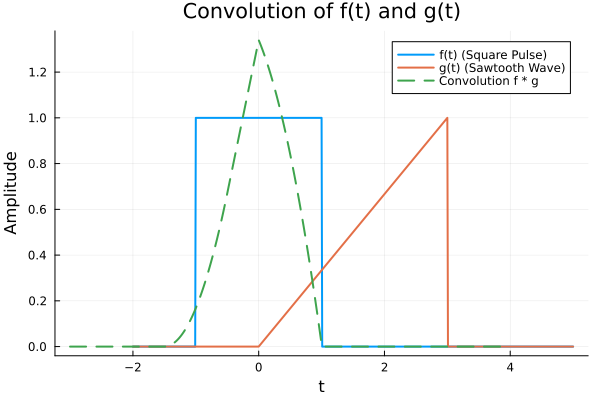

In [1]:
using DSP, Plots

# Define the time step for discrete convolution
dt = 0.01
t = -2:dt:5  # Extended time range for convolution visualization

# Define f(t): Rectangular Pulse from t = -1 to t = 1
f = Float64[(t_i >= -1 && t_i <= 1) ? 1.0 : 0.0 for t_i in t]

# Define g(t): Sawtooth function from t = 0 to t = 3 with peak at (3,1)
g = Float64[(t_i >= 0 && t_i <= 3) ? t_i / 3 : 0.0 for t_i in t]

# Compute the convolution
y = dt * conv(f, g)  # Multiply by dt to approximate integral

# Adjust t_conv to range from -3 to 5
t_conv = range(-3, stop=4, length=length(y))

# Plot the original signals
plot(t, f, label="f(t) (Square Pulse)", lw=2, xlabel="t", ylabel="Amplitude", title="Convolution of f(t) and g(t)")
plot!(t, g, label="g(t) (Sawtooth Wave)", lw=2)

# Plot convolution result
plot!(t_conv, y, label="Convolution f * g", lw=2, linestyle=:dash)

# **Give the Inverse Laplace**


$H(s) = \frac{3s + 7}{s^2 - 2s - 3}$

[5 points]


---
To find the inverse Laplace transform of:

$H(s) = \frac{3s + 7}{s^2 - 2s - 3}$

### **Step 1: Factor the Denominator**
Factor the quadratic denominator:

$s^2 - 2s - 3 = (s - 3)(s + 1)$

Thus, we rewrite:

$H(s) = \frac{3s + 7}{(s - 3)(s + 1)}$

### **Step 2: Perform Partial Fraction Decomposition**
We assume:

$\frac{3s + 7}{(s - 3)(s + 1)} = \frac{A}{s - 3} + \frac{B}{s + 1}$

Multiply both sides by $(s - 3)(s + 1)$ to eliminate the denominators:

$3s + 7 = A(s + 1) + B(s - 3)$

Expand:

$3s + 7 = A s + A + B s - 3B$

$3s + 7 = (A + B)s + (A - 3B)$

### **Step 3: Solve for $A$ and $B$**
By comparing coefficients:

1. $A + B = 3$  (coefficient of $s$)
2. $A - 3B = 7$  (constant term)

Solve the system:

- From $A = 3 - B$, substitute into the second equation:

$\begin{align} 
(3 - B) - 3B &= 7 \\ 
3 - B - 3B &= 7 \\ 
3 - 4B &= 7 \\
-4B &= 4 \\
B &= -1 
\end{align}$

- Substitute $B = -1$ into $A = 3 - B$:

$A = 3 - (-1) = 4$

### **Step 4: Take the Inverse Laplace Transform**
Now we rewrite:

$H(s) = \frac{4}{s - 3} - \frac{1}{s + 1}$

Using known inverse Laplace transforms:

$\mathcal{L}^{-1} \left( \frac{1}{s - a} \right) = e^{at}$

we get:

$h(t) = 4e^{3t} - e^{-t}, \quad t \geq 0$

### **Final Answer:**
$h(t) = 4e^{3t} - e^{-t}, \quad t \geq 0$


# **Causal LTI**

Input: 
$x[n] = \left(\frac{1}{2}\right)^n u[n] - \frac{1}{4} \left( \frac{1}{2}\right)^{n-1} u[n-1]$

as output:
$y[n] = \left(\frac{1}{3}\right)^n u[n]$

$u[n]$ is the unit step function.

Determine:
- The transfer function $H(z)$
- The impulse response $h[n]$
- The corresponding difference equation

Hint: Except for the scalar, the second component of $x[n]$ is identical to the 1st component with a unit delay.

[8 points]

---
To analyze the causal LTI system given by:

$x[n] = \left(\frac{1}{2}\right)^n u[n] - \frac{1}{4} \left( \frac{1}{2}\right)^{n-1} u[n-1]$

which produces the output:

$y[n] = \left(\frac{1}{3}\right)^n u[n]$

we will determine the transfer function $H(z)$, the impulse response $h[n]$, and the difference equation.

### **Step 1: Compute the Z-transform of $x[n]$ and $y[n]$**
The **Z-transform** of a geometric sequence:

$\mathcal{Z} \left[ a^n u[n] \right] = \frac{1}{1 - a z^{-1}}, \quad |z| > |a|$

Applying this to each term in $x[n]$:

1. **First term:**
$\mathcal{Z} \left[ \left(\frac{1}{2}\right)^n u[n] \right] = \frac{1}{1 - \frac{1}{2} z^{-1}}$

2. **Second term:**
$\mathcal{Z} \left[ \frac{1}{4} \left( \frac{1}{2} \right)^{n-1} u[n-1] \right]$

   - Recognizing that $u[n-1]$ introduces a **unit delay** (multiplication by $z^{-1}$ in the Z-domain):

$\mathcal{Z} \left[ \left(\frac{1}{2}\right)^n u[n] \right] = \frac{1}{1 - \frac{1}{2} z^{-1}}$

     So the delayed version is:

$z^{-1} \frac{1}{1 - \frac{1}{2} z^{-1}}$

   - Multiplying by $\frac{1}{4}$:

$\frac{1}{4} z^{-1} \frac{1}{1 - \frac{1}{2} z^{-1}}$

Thus, the Z-transform of $x[n]$ is:

$X(z) = \frac{1}{1 - \frac{1}{2} z^{-1}} - \frac{1}{4} z^{-1} \frac{1}{1 - \frac{1}{2} z^{-1}}$

Factoring:

$X(z) = \left( 1 - \frac{1}{4} z^{-1} \right) \frac{1}{1 - \frac{1}{2} z^{-1}}$

For $y[n]$:

$Y(z) = \frac{1}{1 - \frac{1}{3} z^{-1}}$

### **Step 2: Compute the Transfer Function $H(z)$**
The transfer function is:

$H(z) = \frac{Y(z)}{X(z)}$

$H(z) = \frac{\frac{1}{1 - \frac{1}{3} z^{-1}}}{\left(1 - \frac{1}{4} z^{-1} \right) \frac{1}{1 - \frac{1}{2} z^{-1}}}$

$H(z) = \frac{(1 - \frac{1}{2} z^{-1})}{(1 - \frac{1}{4} z^{-1})(1 - \frac{1}{3} z^{-1})}$

### **Step 3: Compute the Impulse Response $h[n]$**
Since:

$H(z) = \frac{(1 - \frac{1}{2} z^{-1})}{(1 - \frac{1}{4} z^{-1})(1 - \frac{1}{3} z^{-1})}$

We perform **partial fraction expansion**:

$\frac{(1 - \frac{1}{2} z^{-1})}{(1 - \frac{1}{4} z^{-1})(1 - \frac{1}{3} z^{-1})} = \frac{A}{1 - \frac{1}{4} z^{-1}} + \frac{B}{1 - \frac{1}{3} z^{-1}}$

Multiplying by $(1 - \frac{1}{4} z^{-1})(1 - \frac{1}{3} z^{-1})$, we get:

$1 - \frac{1}{2} z^{-1} = A(1 - \frac{1}{3} z^{-1}) + B(1 - \frac{1}{4} z^{-1})$

Expanding:

$1 - \frac{1}{2} z^{-1} = A - \frac{A}{3} z^{-1} + B - \frac{B}{4} z^{-1}$

Grouping terms:

$( A + B ) + \left( -\frac{A}{3} - \frac{B}{4} \right) z^{-1} = 1 - \frac{1}{2} z^{-1}$

Solving for $A$ and $B$:

1. $A + B = 1$
2. $-\frac{A}{3} - \frac{B}{4} = -\frac{1}{2}$

Solve for $A$ and $B$:

From $A + B = 1$, we express $B$ as:

$B = 1 - A$

Substituting into the second equation:

$-\frac{A}{3} - \frac{(1 - A)}{4} = -\frac{1}{2}$

Multiplying by 12 to clear fractions:

$\begin{align*} -4A - 3 + 3A = -6 \\ -4A + 3A = -3 \\ - A = -3 \\ A = 3 \end{align*}$

$B = 1 - 3 = -2$

Thus:

$H(z) = \frac{3}{1 - \frac{1}{4} z^{-1}} - \frac{2}{1 - \frac{1}{3} z^{-1}}$

Taking inverse Z-transform:

$h[n] = 3 \left(\frac{1}{4}\right)^n u[n] - 2 \left(\frac{1}{3}\right)^n u[n]$

### **Step 4: Find the Difference Equation**
From:

$Y(z) = H(z) X(z)$

$(1 - \frac{1}{4} z^{-1})(1 - \frac{1}{3} z^{-1}) Y(z) = (1 - \frac{1}{2} z^{-1}) X(z)$

Taking the inverse Z-transform:

$y[n] - \frac{1}{4} y[n-1] - \frac{1}{3} y[n-1] + \frac{1}{12} y[n-2] = x[n] - \frac{1}{2} x[n-1]$

$y[n] - \frac{7}{12} y[n-1] + \frac{1}{12} y[n-2] = x[n] - \frac{1}{2} x[n-1]$

### **Final Answers:**
1. **Transfer Function:**
$\boxed{ H(z) = \frac{(1 - \frac{1}{2} z^{-1})}{(1 - \frac{1}{4} z^{-1})(1 - \frac{1}{3} z^{-1})} }$

2. **Impulse Response:**
$\boxed{ h[n] = 3 \left(\frac{1}{4}\right)^n u[n] - 2 \left(\frac{1}{3}\right)^n u[n] }$

3. **Difference Equation:**
$\boxed{ y[n] - \frac{7}{12} y[n-1] + \frac{1}{12} y[n-2] = x[n] - \frac{1}{2} x[n-1] }$


# **Continuous-time signal**

**Continuous-time signal** contains 2 frequencies

$x_1 = 1605 \text{ Hz}$

$x_2 = 1645 \text{ Hz}$

sampled at $10 \text{ kHz}$.

Given 200 samples, state whether or not it is possible to resolve the two frequencies using DFT.

Discuss leakage and windowing.

[4 points]

To determine whether it is possible to resolve the two frequencies using the **Discrete Fourier Transform (DFT)**, we analyze the resolution, spectral leakage, and windowing effects.

---

### **Step 1: Frequency Resolution of the DFT**
The frequency resolution of a DFT is given by:

$\Delta f = \frac{f_s}{N}$

where:
- $f_s = 10$ kHz is the sampling frequency,
- $N = 200$ is the number of samples.

$\Delta f = \frac{10,000}{200} = 50 \text{ Hz}$

The two signal frequencies are:
- $x_1 = 1605$ Hz
- $x_2 = 1645$ Hz

The frequency separation is:

$\Delta x = 1645 - 1605 = 40 \text{ Hz}$

Since the separation ($40$ Hz) is **smaller** than the DFT resolution ($50$ Hz), **the two frequencies cannot be resolved using a 200-point DFT**.

---

### **Step 2: Spectral Leakage and Windowing**
- **Spectral leakage** occurs when a signal’s frequency components do not align exactly with the DFT bin centers. This results in energy spreading across neighboring bins, making it harder to distinguish closely spaced frequencies.
- In our case, **1605 Hz and 1645 Hz do not align with 50 Hz bins**, causing significant spectral leakage.
- **Windowing** techniques (such as Hamming, Hanning, or Blackman) help reduce leakage but come at the cost of widening the main lobe in the frequency domain, further reducing the ability to resolve close frequencies.

---

### **Conclusion**
- The two frequencies **cannot be resolved** using a 200-point DFT due to insufficient frequency resolution ($\Delta f = 50$ Hz vs. $\Delta x = 40$ Hz).
- Spectral leakage will further blur the distinction between the two frequencies.
- Using **zero-padding** (increasing $N$) or a **longer data record** would improve resolution.
- **Applying a window function** can reduce leakage but will also slightly widen peaks, making resolution harder.

Thus, a **larger $N$** (e.g., 250 or more) is needed to reliably separate the two frequencies.

# PDF of

$f(x) = A e^{- \lambda x}$

[8 points]

---

### probability density function (PDF)

Here is the probability density function (PDF) for the exponential distribution:

$f(x) = \begin{cases} A e^{-\lambda x}, & x \geq 0 \\ 0, & x < 0 \end{cases}$

where:  
- $A$ is a scaling factor (often set to $\lambda$ to ensure normalization).  
- $\lambda > 0$ is the rate parameter.

If the function represents a valid probability density function, then it must satisfy the normalization condition:

$\int_0^\infty A e^{-\lambda x} \, dx = 1$

Solving for $A$:

$A \int_0^\infty e^{-\lambda x} \, dx = 1$

$A \left[ \frac{e^{-\lambda x}}{-\lambda} \right]_0^\infty = 1$

$A \left( 0 - \left(-\frac{1}{\lambda}\right) \right) = 1$

$A \cdot \frac{1}{\lambda} = 1$

$A = \lambda$

Thus, the standard form of the exponential distribution PDF is:

$f(x) = \begin{cases} \lambda e^{-\lambda x}, & x \geq 0 \\ 0, & x < 0 \end{cases}$

### Usage

The function  

$f(x) = A e^{-\lambda x}$

appears in various fields, particularly in **probability theory**, **physics**, **engineering**, and **signal processing**. Here are some common contexts:

#### **1. Probability and Statistics**
- **Exponential Distribution**:  
  When $A = \lambda$ and $x \geq 0$, this represents the probability density function (PDF) of an **exponential distribution**:
  
$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$
  
  - Used to model **waiting times** (e.g., time between arrivals in a Poisson process).
  - Appears in **reliability analysis** (e.g., time until failure of a system).

### **2. Engineering and Signal Processing**
- **Impulse Response of an RC Circuit**:
  - The voltage or current response of a first-order low-pass filter follows an exponential decay.
  
- **Damping in Mechanical and Electrical Systems**:
  - In damped oscillatory systems, the envelope of oscillations is often modeled as $A e^{-\lambda x}$.

- **Fourier and Laplace Transforms**:
  - Appears in the Laplace transform of simple decaying exponentials:
  
$\mathcal{L} \{ e^{-\lambda x} \} = \frac{1}{s + \lambda}$

### **4. Economics**
- **Discounted Cash Flow (DCF)**:
  - In finance, future cash flows are discounted using an exponential decay factor.

---

### **Conclusion**
The function $f(x) = A e^{-\lambda x}$ is widely used in modeling **decay, probability distributions, filtering, and damping** in multiple disciplines.

---

The rate parameter $\lambda$ appears twice in the exponential probability density function (PDF):  

$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$

for the following reasons:

### **1. Ensuring Proper Normalization**  
A probability density function must satisfy:

$\int_0^{\infty} f(x) \,dx = 1$

If we assume the form $f(x) = A e^{-\lambda x}$, we need to determine $A$ such that the total probability is 1:

$\int_0^{\infty} A e^{-\lambda x} \,dx = 1$

Using the standard integral:

$\int_0^{\infty} e^{-\lambda x} \,dx = \frac{1}{\lambda}$

we solve for $A$:

$A \cdot \frac{1}{\lambda} = 1$

which gives $A = \lambda$. This ensures that the total probability sums to 1.

### **2. Rate Parameter Controls Both Scale and Decay Rate**  
- The **$e^{-\lambda x}$** term describes the **exponential decay** of probability.
- The **$\lambda$** in front scales the function to ensure it integrates to 1.

Physically, $\lambda$ represents the **average rate** of occurrence of an event per unit time. The **mean** of an exponentially distributed random variable is:

$E[X] = \frac{1}{\lambda}$

So, if $\lambda$ is **large**, events happen frequently (fast decay). If $\lambda$ is **small**, events are rare (slow decay).

# Linear Algebra 1

[4 points]

---
To perform curve fitting using linear algebra, follow these steps:

1. **Choose a Model**: Select a function to fit the data (e.g., linear, quadratic, exponential). Ensure the model is linear in its parameters (e.g., $y = mx + b$, $y = ax^2 + bx + c$, or linearized forms like $\ln y = bx + c$ for exponentials).

2. **Construct the Design Matrix (A)**:
   - For a polynomial $y = a_0 + a_1x + \dots + a_nx^n$, each row corresponds to a data point $(x_i, y_i)$ with entries $[x_i^n, x_i^{n-1}, \dots, 1]$.
   - Example (linear fit for points $(1,2), (2,3), (3,5)$):
$A = \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 3 & 1 \end{bmatrix}, \quad Y = \begin{bmatrix} 2 \\ 3 \\ 5 \end{bmatrix}$

3. **Formulate the Normal Equations**:
   - Compute $A^T A$ and $A^T Y$:
$A^T A = \begin{bmatrix} 14 & 6 \\ 6 & 3 \end{bmatrix}, \quad A^T Y = \begin{bmatrix} 23 \\ 10 \end{bmatrix}$
   - Solve $(A^T A) \mathbf{v} = A^T Y$ for coefficients $\mathbf{v}$.

4. **Solve for Coefficients**:
   - Using elimination or matrix inversion:
$\mathbf{v} = (A^T A)^{-1} A^T Y$
   - For the example, solving gives $m = 1.5$, $b = \frac{1}{3}$.

5. **Verify and Use the Model**:
   - Plug coefficients into the model (e.g., $y = 1.5x + \frac{1}{3}$).
   - Check residuals to assess fit quality.

**Generalization to Higher Degrees**:
- For a quadratic fit, include $x^2$ terms in $A$:
$A = \begin{bmatrix} 1 & 1 & 1 \\ 4 & 2 & 1 \\ 9 & 3 & 1 \\ 16 & 4 & 1 \end{bmatrix}, \quad Y = \begin{bmatrix} 3 \\ 5 \\ 6 \\ 5 \end{bmatrix}$
- Solve similarly to find coefficients $a, b, c$.

**Key Considerations**:
- **Numerical Stability**: Use QR decomposition or SVD for ill-conditioned matrices.
- **Nonlinear Models**: Linearize where possible (e.g., log transforms for exponentials).

**Final Answer**:
Linear algebra facilitates curve fitting by solving the normal equations $A^T A \mathbf{v} = A^T Y$, yielding coefficients that minimize the sum of squared residuals. For a best-fit line $y = mx + b$ through points $(1,2), (2,3), (3,5)$, the solution is $\boxed{y = \frac{3}{2}x + \frac{1}{3}}$.

## relationship between **curve fitting**, **linear algebra**

The relationship between **curve fitting**, **linear algebra**, and **least squares** lies in how we approximate data with a mathematical model by minimizing errors. Here's a breakdown:

#### **1. Curve Fitting and Least Squares**
- Curve fitting aims to find a function $f(x)$ that best represents a set of data points $(x_i, y_i)$.
- If the relationship is **linear in parameters**, we can express it as:

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon$

  where $\epsilon$ is the error term.
- The **least squares method** minimizes the sum of squared errors:

$S = \sum_{i=1}^{N} (y_i - f(x_i))^2$

  ensuring the best fit.

#### **2. Linear Algebra Representation**
- We rewrite the problem in matrix form:

$\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}$

  where:
  - $\mathbf{Y}$ is the vector of observed values $y_i$,
  - $\mathbf{X}$ is the **design matrix** containing the input data,
  - $\boldsymbol{\beta}$ is the vector of unknown parameters,
  - $\boldsymbol{\epsilon}$ is the error vector.

- **Example for a linear model** $y = \beta_0 + \beta_1 x$:

$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_N \end{bmatrix}$

#### **3. Solving for $\boldsymbol{\beta}$ using Least Squares**
- The least squares solution minimizes:

$S = \| \mathbf{Y} - \mathbf{X} \boldsymbol{\beta} \|^2$

  The optimal parameters satisfy the **normal equation**:

$(\mathbf{X}^T \mathbf{X}) \boldsymbol{\beta} = \mathbf{X}^T \mathbf{Y}$

  - If $\mathbf{X}^T \mathbf{X}$ is invertible, the solution is:

$\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}$

  - If not, we use **QR decomposition** or **singular value decomposition (SVD)**.

#### **4. Generalization to Nonlinear Models**
- Some models, like $y = A e^{-\lambda x}$, are **nonlinear in parameters**.
- We can linearize them (e.g., using logarithms) or use **nonlinear least squares** (e.g., Levenberg-Marquardt).

#### **Summary**
- **Curve fitting** finds an approximate function for given data.
- **Least squares** minimizes the error between the model and data.
- **Linear algebra** (matrices & normal equations) provides an efficient way to solve for parameters.
- **For linear models**, the solution is direct via $\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}$.
- **For nonlinear models**, iterative methods like gradient descent or Gauss-Newton are used.


# Linear Algebra 2

[8 points]

$A = \begin{bmatrix} 1 & 1 & 1 & 1 \\ 2 & 1 & 4 & 3 \\ 3 & 4 & 1 & 2 \end{bmatrix}$

Let's manually compute the **Reduced Row Echelon Form (RREF)** of the given matrix $A$:


$\underbrace{\begin{bmatrix} 1 & 1 & 1 & 1 \\ 0 & -1 & 2 & 1 \\ 3 & 4 & 1 & 2 \end{bmatrix}}_{R_2 \leftarrow R_2 - 2R_1} \; \to$
$\underbrace{\begin{bmatrix} 1 & 1 & 1 & 1 \\ 0 & -1 & 2 & 1 \\ 0 & 1 & -2 & -1 \end{bmatrix}}_{R_3 \leftarrow R_3 - 3R_1} \; \to$
$\underbrace{\begin{bmatrix} 1 & 1 & 1 & 1 \\ 0 & 1 & -2 & -1 \\ 0 & 1 & -2 & -1 \end{bmatrix}}_{R_2 \leftarrow -R_2} \; \to$
$\underbrace{\begin{bmatrix} 1 & 1 & 1 & 1 \\ 0 & 1 & -2 & -1 \\ 0 & 0 & 0 & 0 \end{bmatrix}}_{R_3 \leftarrow R_3 - R_2} \; \to$
$\underbrace{\begin{bmatrix} 1 & 0 & 3 & 2 \\ 0 & 1 & -2 & -1 \\ 0 & 0 & 0 & 0 \end{bmatrix}}_{R_1 \leftarrow R_1 - R_2}$

### **Final RREF:** (Reduced Row Echelon Form)
$\begin{bmatrix} \underbrace{1}_{\text{pivot}} & 0 & 3 & 2 \\ 0 & \underbrace{1}_{\text{pivot}} & -2 & -1 \\ 0 & 0 & 0 & 0 \end{bmatrix}$
$\begin{bmatrix}
   x_1 \\
   x_2 \\
   x_3 \\
   x_4
\end{bmatrix} =
\begin{bmatrix}
   0 \\
   0 \\
   0 
\end{bmatrix}$

$C(A) = \text{ column span of A }\left( \begin{bmatrix}
                       1 \\ 
                       2 \\
                       3 
                    \end{bmatrix}
                    \begin{bmatrix}
                       1 \\ 
                       1 \\
                       4 
                    \end{bmatrix}
                    \begin{bmatrix}
                       1 \\ 
                       4 \\
                       1 
                    \end{bmatrix}
                    \begin{bmatrix}
                       1 \\ 
                       3 \\
                       2 
                    \end{bmatrix}
                \right)$

The Null Space $N(A) = N( rref(A) )$ is a set of all vectors that satisfy :

$\begin{align}
x_1 + 0 x_2 + 3 x_3 + 2 x_4 = 0 \\
0 x_1 + x_2 - \underbrace{2 x_3}_{x_3\text{ free}} -   \underbrace{x_4}_{x_4\text{ free}} = 0 
\end{align}$

let's solve the pivot entries

$\begin{align}
x_1 &= - 3 x_3 - 2 x_4 \\
x_2 &= 2 x_3 + x_4
\end{align}$


$\text{Col}_3 = 3 \begin{bmatrix}
       1 \\ 
       2 \\
       3 
    \end{bmatrix} + (-2) 
    \begin{bmatrix}
       1 \\ 
       1 \\
       4 
    \end{bmatrix}$
$\text{Col}_4 = 2 \cdot \text{Col}_1 + (-1) \cdot \text{Col}_2$


$\left\{ \begin{bmatrix}
       1 \\ 
       2 \\
       3 
    \end{bmatrix}
    \begin{bmatrix}
       1 \\ 
       1 \\
       4 
    \end{bmatrix}
\right\} \text{ is the basis for C(A) }$



- [Null space and column space basis | Vectors and spaces | Linear Algebra | Khan Academy](https://www.youtube.com/watch?v=_uTAdf_AsfQ)